<h1> Wohunngsanalyse </h1>

<p> Goals: Build a machine learning model to predict house pricing in Germany based on several factors and compare it for the Bundesländer. </p>

The dataset was obtain from Kaggle under the following link:
https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany

<h3> 1. Import Python Modules </h3>

In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [2]:
pd.__version__

'1.1.3'

<h3> 2. Import Data </h3>

In [3]:
#Let's import the dataset and see the first 5 rows as well as the existing columns
housing= pd.read_csv("immo_data.csv")
housing.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


<h3> 3. Preliminary analysis of the dataset: </h3>


In [4]:
#We could see a preview of the first five rows and some columns of the data set, but let's check  all the columns this dataset contains. 
housing.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

These columns represent the following information:
    
 * regio1: Bundesland
 * serviceCharge: auxiliary costs such as electricity or internet in euros
 *  heatingType: Type of heating
 * telekomTvOffer: Is payed TV included if so which offer
 * telekomHybridUploadSpeed: how fast is the hybrid inter upload speed
 * newlyConst: If the building is a recent construction
 * balcony: Does the property has a balcony?
 * picturecount: how many pictures were uploaded to the listing
 * pricetrend: price trend as calculated by Immoscout
 * telekomUploadSpeed: how fast is the internet upload speed
 * totalRent: total rent (usually a sum of base rent, service charge and heating cost)
 * yearConstructed: construction year
 * scoutid: immoscout Id
 * noParkSpaces: number of parking spaces
 * firingTypes: main energy sources, separated by colon
 * hasKitchen: does the property has a kitchen?
 * geo_bln: bundesland (state), same as regio1
 * cellar: does the property has a cellar?
 * yearConstructed: binned construction year, 1 to 9
 * baseRent: base rent without electricity and heating
 * houseNumber: house number
 * livingSpace: living space in sqm
 * geo_krs: district, above ZIP code
 * condition: condition of the flat 
 * interiorQual: interior quality
 * petsAllowed: are pets allowed, yes/no or negotiable
 * street: street name
 * streetPlain: street name (plain, different formating)
 * lift: is elevator available?
 * baseRentRange: binned base rent, 1 to 9
 * typeOfFlat: type of flat
 * geo_plz: ZIP code
 * noRooms: number of rooms
 * thermalChar: energy need in kWh/m^2a, defines the energy efficiency class
 * floor: which floor is the flat on
 * numberOfFloors: number of floors in the building
 * noRoomsRange: binned number of rooms, 1 to 5
 * garden: does the property has a garden
 * livingSpaceRange: binned living space, 1 to 7
 * regio2: District or Kreis, same as geo krs
 * regio3: City/town
 * description: free text description of the object 
 * facilities: free text description about available facilities
 * heatingCosts: monthly heating costs in euros
 * energyEfficiency: energy efficiency class (based on binned thermalChar, deprecated since Feb 2020)
 * lastRefurbish: year of last renovation
 * electricityBasPrice: monthly base price for electricity in euro (deprectaded since Feb 2020)
 * electricityKwhPrice: electricity price peer kwh (deprecated since Feb 2020)
 * date: time of scraping
 

In [5]:
print(housing.shape)
print(housing.info())

(268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052

We have 49 columns and 268,850 rows in the dataset, from which 6 columns are yes or no, 18 have values with decimal points, 6 have integer numbers, and 19 are marked as object. Now let's check which of the columns have 0 values in them:

In [6]:
housing.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

With this matrix we can quickly see which columns have missing data. We can see for example that for telekomHybridUploadSpeed there are a lot of missing values, as well as for the last five columns before date. So now we will remove the Nan values in some of the columns to get a more compact dataset:

<AxesSubplot:>

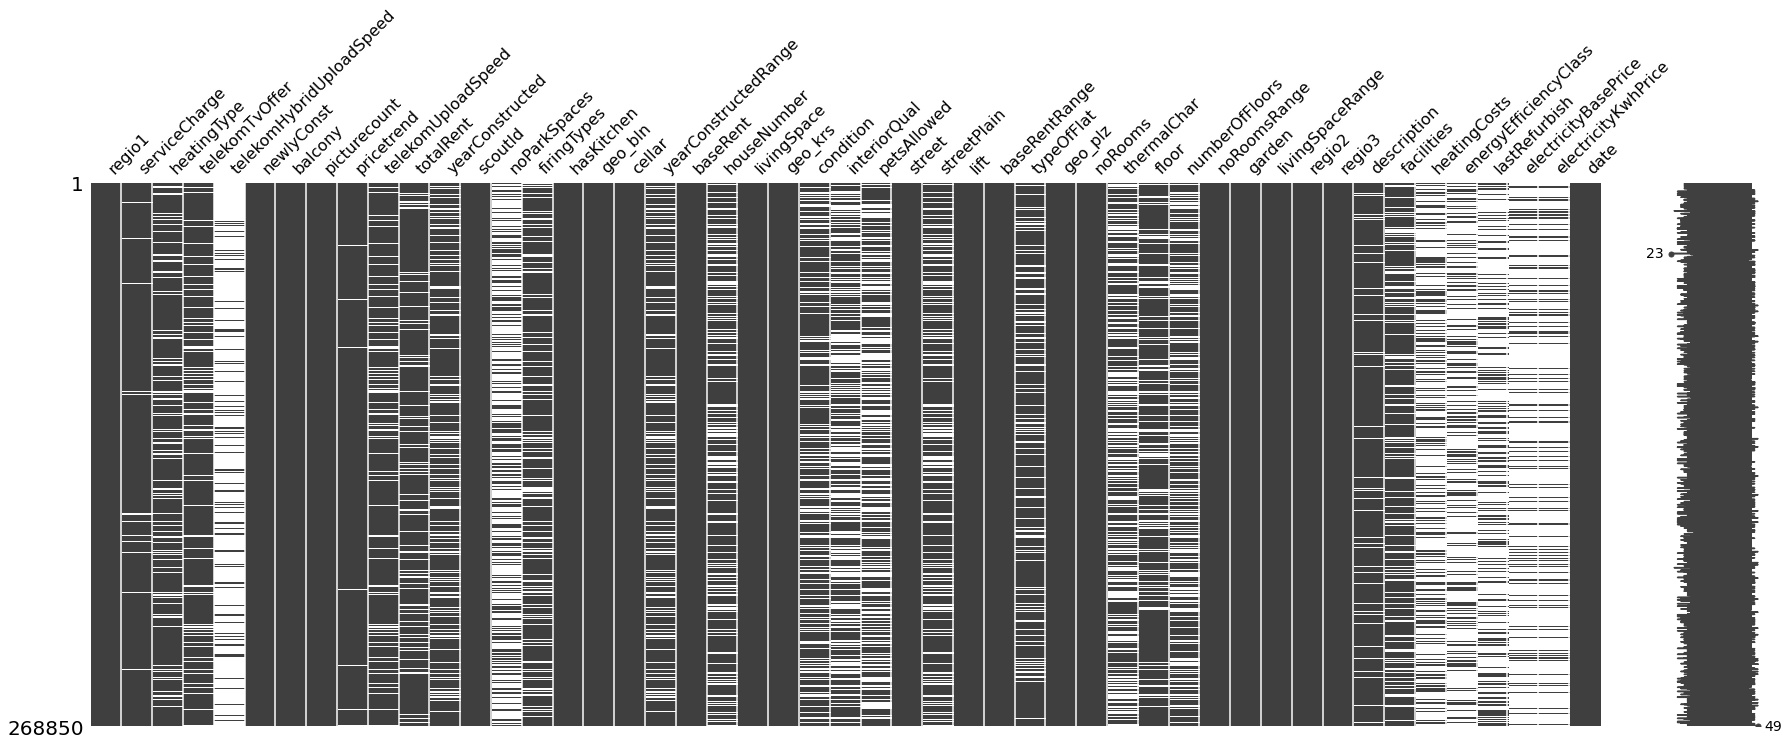

In [7]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing,figsize =(30,10))

We are making a new subset from the data set dropping certain columns with missing values, so we can work the dataset better and get more accurate results.

In [8]:
#Making a new data set keeping the columns I am interested in
housing_subset= housing[['regio1', 'serviceCharge', 'heatingType','newlyConst', 'balcony',  'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',  'baseRent',  'livingSpace',  'condition', 'interiorQual', 'petsAllowed','lift',  'typeOfFlat',  'noRooms',  'floor', 'numberOfFloors',  'noRoomsRange', 'garden',   'heatingCosts', 'energyEfficiencyClass','lastRefurbish', 'electricityBasePrice', 'date']]
housing_subset

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


In [9]:
#Let's describe it to get a general feeling of the dataset to see a general picture 

housing_subset.describe()

,serviceCharge,totalRent,yearConstructed,noParkSpaces,baseRent,livingSpace,noRooms,floor,numberOfFloors,noRoomsRange,heatingCosts,lastRefurbish,electricityBasePrice
count,261941.000000,2.283330e+05,211805.000000,93052.000000,2.688500e+05,268850.000000,268850.000000,217541.000000,171118.000000,268850.000000,85518.000000,80711.000000,46846.000000
mean,151.206113,9.013315e+02,1966.400590,1.327634,6.941294e+02,74.355548,2.641261,2.122405,3.572319,2.571542,76.990866,2013.904536,89.113612
std,308.295790,3.323833e+04,46.992207,8.361403,1.953602e+04,254.759208,2.633440,3.634934,6.375496,0.937594,147.716278,10.963125,5.395805
min,0.000000,0.000000e+00,1000.000000,0.000000,0.000000e+00,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000,1015.000000,71.430000
25%,95.000000,4.698000e+02,1950.000000,1.000000,3.380000e+02,54.000000,2.000000,1.000000,2.000000,2.000000,54.000000,2012.000000,90.760000
50%,135.000000,6.500000e+02,1973.000000,1.000000,4.900000e+02,67.320000,3.000000,2.000000,3.000000,3.000000,70.000000,2017.000000,90.760000
75%,190.000000,9.850000e+02,1996.000000,1.000000,7.990000e+02,87.000000,3.000000,3.000000,4.000000,3.000000,90.000000,2019.000000,90.760000
max,146118.000000,1.575154e+07,2090.000000,2241.000000,9.999999e+06,111111.000000,999.990000,999.000000,999.000000,5.000000,12613.000000,2919.000000,90.760000


In [10]:
#are there missing values in the sub set ?
housing_subset.isna().sum()

regio1                        0
serviceCharge              6909
heatingType               44856
newlyConst                    0
balcony                       0
totalRent                 40517
yearConstructed           57045
noParkSpaces             175798
firingTypes               56964
hasKitchen                    0
geo_bln                       0
cellar                        0
baseRent                      0
livingSpace                   0
condition                 68489
interiorQual             112665
petsAllowed              114573
lift                          0
typeOfFlat                36614
noRooms                       0
floor                     51309
numberOfFloors            97732
noRoomsRange                  0
garden                        0
heatingCosts             183332
energyEfficiencyClass    191063
lastRefurbish            188139
electricityBasePrice     222004
date                          0
dtype: int64

<AxesSubplot:>

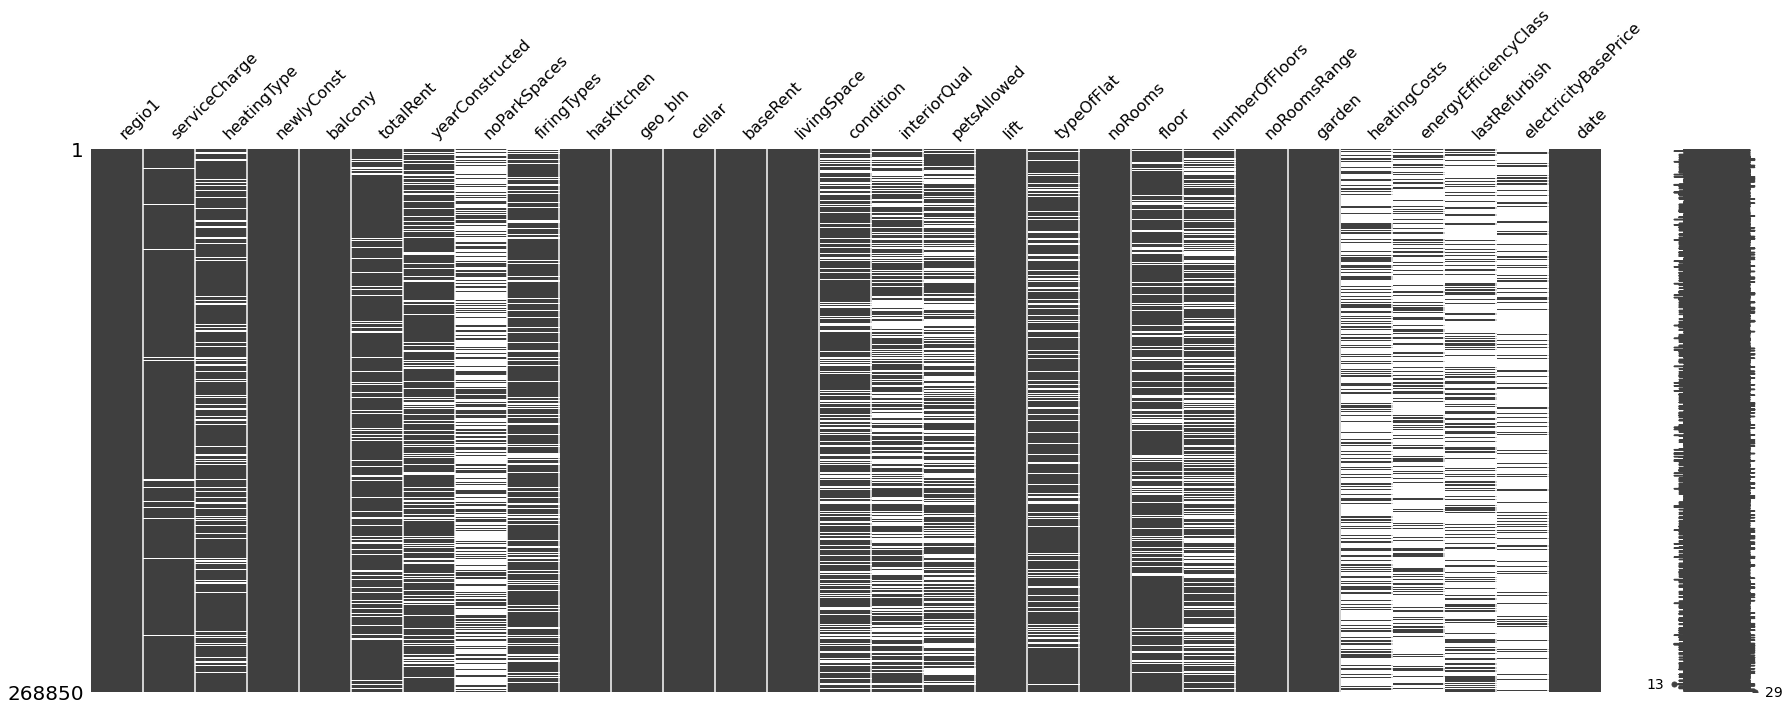

In [11]:
#Plot graphic of missing values (if there is any missing data)
import missingno
missingno.matrix(housing_subset,figsize =(30,10))

In [12]:
#how does it look like when electricity Base Price doesn't have any value.
housing_subset[housing_subset['electricityBasePrice'].isna()]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0,1965.0,1.0,oil,False,Nordrhein_Westfalen,True,595.0,86.00,well_kept,normal,NaN,False,ground_floor,4.0,1.0,3.0,4,True,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,NaN,1871.0,2.0,gas,False,Rheinland_Pfalz,False,800.0,89.00,refurbished,normal,no,False,ground_floor,3.0,NaN,NaN,3,False,NaN,NaN,2019.0,NaN,May19
2,Sachsen,255.00,floor_heating,True,True,1300.0,2019.0,1.0,NaN,False,Sachsen,True,965.0,83.80,first_time_use,sophisticated,NaN,True,apartment,3.0,3.0,4.0,3,False,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,False,True,NaN,1964.0,NaN,district_heating,False,Sachsen,False,343.0,58.15,NaN,NaN,NaN,False,other,3.0,3.0,NaN,3,False,87.23,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,False,True,903.0,1950.0,NaN,gas,False,Bremen,False,765.0,84.97,refurbished,NaN,NaN,False,apartment,3.0,1.0,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,False,True,910.0,2016.0,1.0,geothermal,False,Bayern,True,820.0,90.00,mint_condition,sophisticated,no,False,roof_storey,3.0,NaN,NaN,3,False,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,False,True,1150.0,1983.0,1.0,gas,True,Hessen,False,930.0,115.00,well_kept,sophisticated,negotiable,False,apartment,3.5,1.0,1.0,3,False,NaN,NaN,2015.0,NaN,May19
268847,Hessen,220.00,central_heating,False,True,930.0,1965.0,1.0,gas,False,Hessen,True,650.0,95.00,well_kept,NaN,negotiable,False,apartment,4.0,1.0,2.0,4,True,NaN,NaN,2019.0,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0,2019.0,1.0,gas,False,Nordrhein_Westfalen,True,840.0,70.00,first_time_use,sophisticated,no,True,apartment,2.0,NaN,5.0,2,False,40.00,NO_INFORMATION,2019.0,NaN,May19


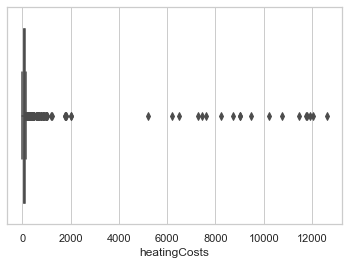

In [13]:
#How to check and remove outliers?

#Let's create a histograme to see the distribution of the data
#how can I specifify the numerical values and give it a scale? 
#sns.displot(housing_subset, x="heatingCosts", kind="kde")


sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=housing_subset["heatingCosts"])

In [14]:
#Let's check the outliers for this data


adapted_rent= housing_subset[(housing.totalRent < 2000) & (housing.totalRent>0)]
adapted_rent= housing_subset[(housing.livingSpace <150)& (housing.livingSpace>0)]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

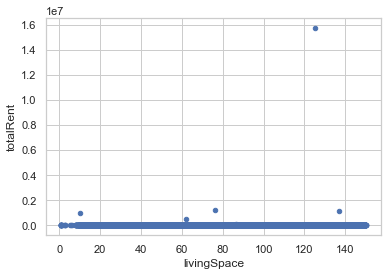

In [27]:
# Let's visualize this 
adapted_rent[['totalRent','livingSpace']].plot(kind= 'scatter',  x='livingSpace' , y='totalRent')



In [10]:
# Unique values.
columns = ['regio1','typeOfFlat','heatingType','condition','regio2','regio3']

for column in columns:
    print('-'*50)
    print('Column name: {c}'.format(c = column.upper()))
    print(housing[column].value_counts())

--------------------------------------------------
Column name: REGIO1
Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64
--------------------------------------------------
Column name: TYPEOFFLAT
apartment              131522
roof_storey             34787
ground_floor            31538
other                    9519
maisonette               9319
raised_ground_floor      5628
penthouse                3568
terraced_flat            3385
half_basement            2013
loft                      957
Name: typeOfFla

In [11]:
property_type = housing.groupby('typeOfFlat').date.count().reset_index()
property_type_asc = property_type.sort_values(by=['date'], ascending = False).reset_index(drop=True)
property_agr= property_type_asc.sort_values(by=['date'], ascending = False).reset_index(drop= True)
property_agr= property_agr[:4]
other_prop= property_type_asc[3:10].reset_index()
other_prop.drop(['index'],axis=1,inplace=True)

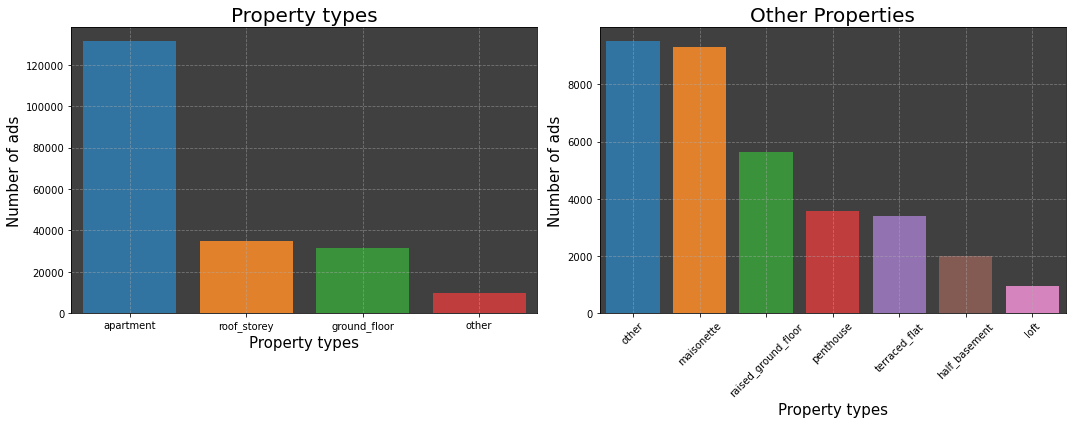

In [12]:
fig = plt.figure(figsize = (15,6))
ax1= fig.add_subplot(121)
ax1= sns.barplot(data = property_agr,x='typeOfFlat',y='date')
ax1.set_title('Property types', fontsize= 20)
ax1.set_xlabel('Property types', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)

ax2= fig.add_subplot(122)
ax2=sns.barplot(data =other_prop,x='typeOfFlat',y='date')
plt.xticks(rotation=45)
ax2.set_title('Other Properties', fontsize = 20)
ax2.set_xlabel('Property types', fontsize =15)
ax2.set_ylabel('Number of ads', fontsize = 15)
ax2.set_facecolor('#404040')
ax2.grid(linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

<AxesSubplot:>

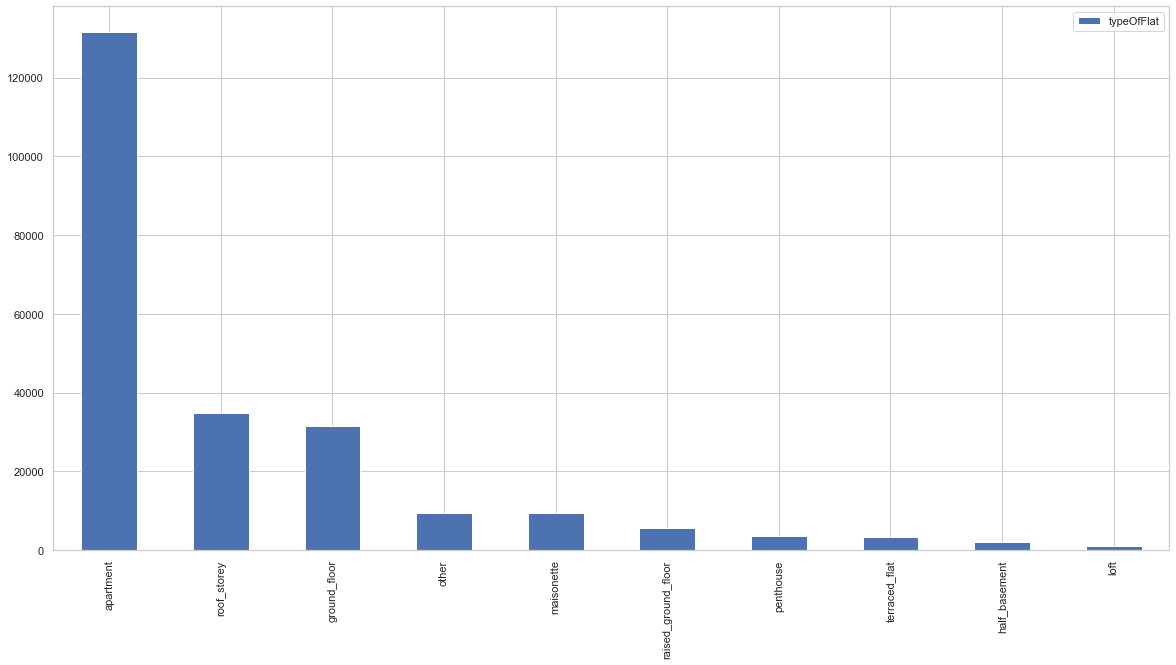

In [16]:
#Let's check the distribution of the typeOfFlat column
pd.DataFrame(housing_subset['typeOfFlat'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

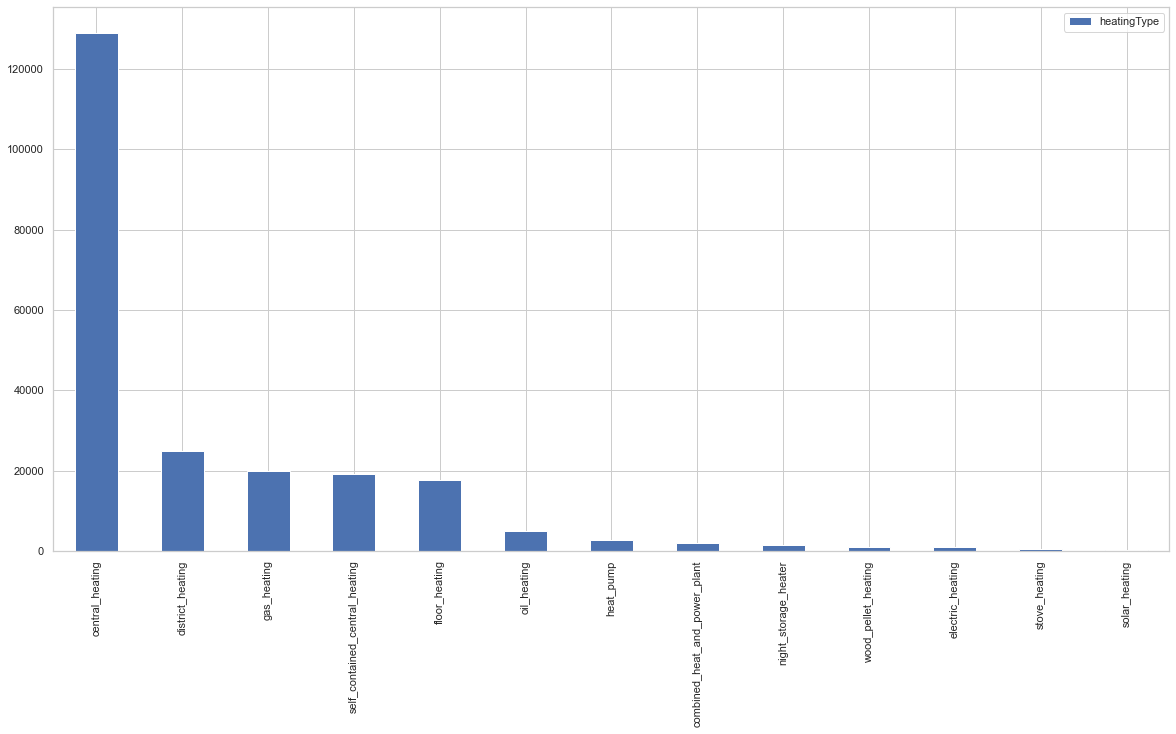

In [17]:
#Let's check the distribution of the heatingType column
pd.DataFrame(housing_subset['heatingType'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

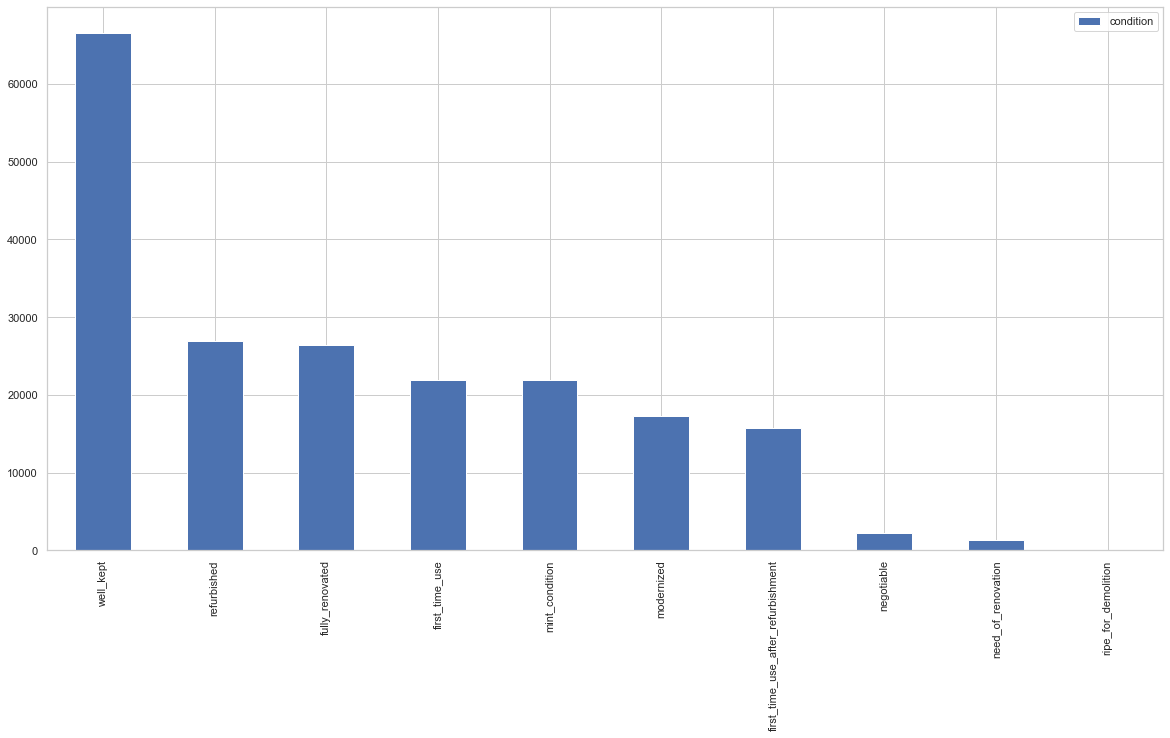

In [18]:
#Let's check the distribution of the condition column
pd.DataFrame(housing_subset['condition'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

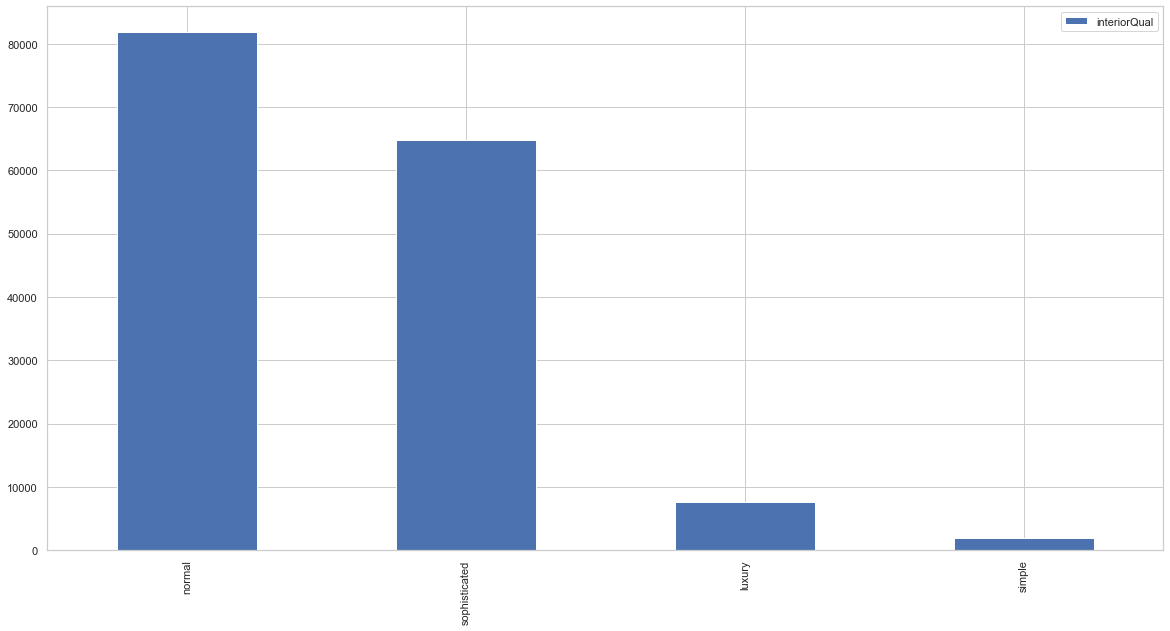

In [19]:
pd.DataFrame(housing_subset['interiorQual'].value_counts()).plot(kind='bar', figsize=(20,10))

<AxesSubplot:>

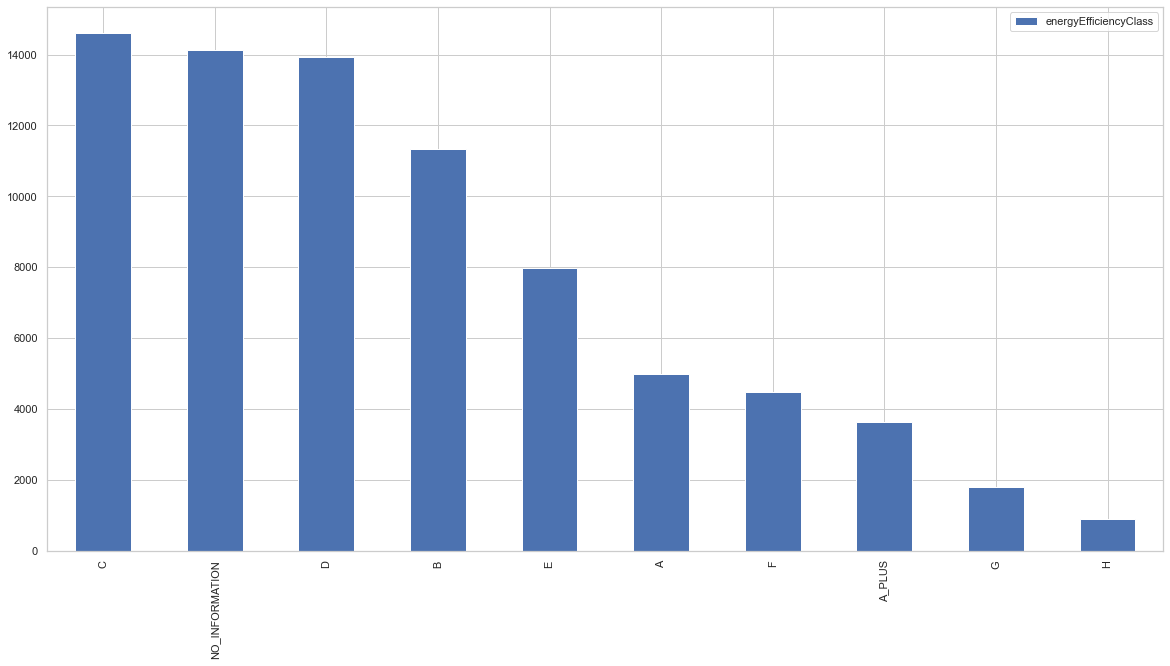

In [20]:
pd.DataFrame(housing['energyEfficiencyClass'].value_counts()).plot(kind='bar', figsize=(20,10))

In [21]:
#Let's explore a bit the binary columns

# have the NAAns and similar been taken out? only 50% have kitchen? 

housing_prop= housing[[ 'newlyConst', 'balcony',  'hasKitchen', 
       'cellar',  'lift',  'garden',]]
housing_prop.apply(pd.Series.value_counts)

,newlyConst,balcony,hasKitchen,cellar,lift,garden
False,247679,103116,176794,96615,205528,216093
True,21171,165734,92056,172235,63322,52757


In [22]:
#What are the possibilities for heatingType

housing_subset['heatingType'].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

<h2> 4. Data Cleaning </h2>

In [23]:
housing_subset.isna().sum()

regio1                        0
serviceCharge              6909
heatingType               44856
newlyConst                    0
balcony                       0
totalRent                 40517
yearConstructed           57045
noParkSpaces             175798
firingTypes               56964
hasKitchen                    0
geo_bln                       0
cellar                        0
baseRent                      0
livingSpace                   0
condition                 68489
interiorQual             112665
petsAllowed              114573
lift                          0
typeOfFlat                36614
noRooms                       0
floor                     51309
numberOfFloors            97732
noRoomsRange                  0
garden                        0
heatingCosts             183332
energyEfficiencyClass    191063
lastRefurbish            188139
electricityBasePrice     222004
date                          0
dtype: int64

In [24]:
housing_subset[housing_subset['serviceCharge'].isna()]

,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,date
72,Sachsen,NaN,NaN,True,False,420.24,2017.0,NaN,district_heating,False,Sachsen,False,329.60,41.00,well_kept,NaN,NaN,False,ground_floor,2.0,1.0,4.0,2,False,NaN,NaN,NaN,90.76,Sep18
118,Bayern,NaN,NaN,True,True,1390.00,2018.0,1.0,district_heating,False,Bayern,False,1390.00,33.00,NaN,NaN,no,True,NaN,1.0,3.0,NaN,1,False,NaN,C,NaN,NaN,May19
176,Niedersachsen,NaN,central_heating,False,False,NaN,1994.0,1.0,oil,False,Niedersachsen,True,850.00,100.00,mint_condition,sophisticated,NaN,False,NaN,3.0,NaN,2.0,3,False,NaN,NaN,2019.0,NaN,May19
188,Nordrhein_Westfalen,NaN,floor_heating,False,False,720.00,NaN,1.0,pellet_heating,False,Nordrhein_Westfalen,True,720.00,96.00,well_kept,normal,NaN,False,other,3.0,1.0,2.0,3,True,NaN,NaN,NaN,90.76,Sep18
208,Niedersachsen,NaN,gas_heating,False,True,460.00,NaN,NaN,NaN,True,Niedersachsen,False,380.00,58.00,NaN,NaN,no,False,apartment,2.0,NaN,NaN,2,False,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268601,Sachsen,NaN,floor_heating,True,True,NaN,2020.0,1.0,gas,False,Sachsen,True,552.00,92.36,first_time_use_after_refurbishment,sophisticated,yes,True,raised_ground_floor,4.5,0.0,5.0,4,False,NaN,NaN,2020.0,NaN,May19
268620,Thüringen,NaN,NaN,False,True,320.00,NaN,NaN,NaN,True,Thüringen,False,320.00,24.00,NaN,NaN,NaN,False,apartment,1.0,1.0,1.0,1,False,NaN,NaN,NaN,NaN,Oct19
268696,Saarland,NaN,NaN,False,True,NaN,1988.0,NaN,district_heating,True,Saarland,False,580.00,60.00,NaN,NaN,no,False,NaN,2.0,NaN,NaN,2,False,NaN,E,NaN,NaN,May19
268711,Thüringen,NaN,NaN,False,True,280.00,1995.0,1.0,NaN,True,Thüringen,False,200.00,23.00,well_kept,normal,NaN,False,roof_storey,1.0,3.0,3.0,1,False,NaN,NaN,NaN,NaN,Oct19


In [25]:
housing_subset['serviceCharge'].value_counts()

150.00    14293
100.00    12995
200.00    11147
120.00    10650
130.00     7455
          ...  
83.79         1
83.71         1
138.19        1
110.65        1
111.61        1
Name: serviceCharge, Length: 12266, dtype: int64

In [26]:
housing_subset['serviceCharge'].describe()

count    261941.000000
mean        151.206113
std         308.295790
min           0.000000
25%          95.000000
50%         135.000000
75%         190.000000
max      146118.000000
Name: serviceCharge, dtype: float64

In [45]:
housing_subset['serviceCharge'].fillna(150, inplace =True)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
housing_subset.serviceCharge.isna().sum()


0

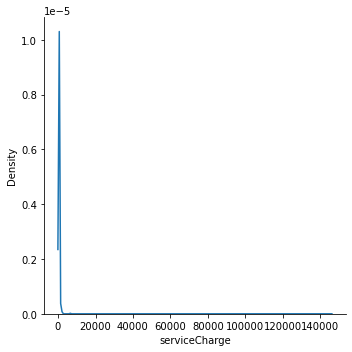

In [22]:
sns.displot(data=housing_subset, x="serviceCharge", kind="kde")

AttributeError: 'Rectangle' object has no property 'fit'

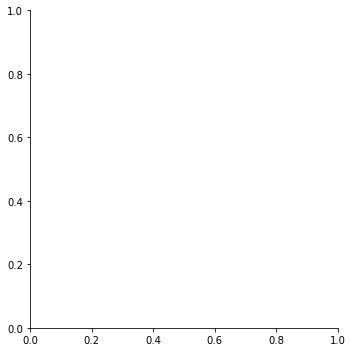

In [20]:
from scipy.stats import norm
ax = sns.displot(housing_subset.serviceCharge, fit=norm, kde=False)

In [17]:
housing.dropna(subset= ['totalRent','serviceCharge','lastRefurbish'])


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
12,Rheinland_Pfalz,270.0,oil_heating,NONE,NaN,False,False,4,2.77,2.4,920.00,1912.0,111251778,NaN,NaN,False,Rheinland_Pfalz,False,1.0,650.0,NaN,100.00,Südliche_Weinstraße_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,5,ground_floor,76833,4.0,NaN,NaN,NaN,4,True,4,Südliche_Weinstraße_Kreis,Frankweiler,Altes Sandsteinhaus unter Denkmalschutz im Jug...,Die Charakteristiken des Jugendstils wurden li...,NaN,NaN,2012.0,NaN,NaN,May19
13,Nordrhein_Westfalen,200.0,central_heating,ONE_YEAR_FREE,NaN,False,False,3,3.45,40.0,1150.00,1951.0,101730329,NaN,oil,False,Nordrhein_Westfalen,False,2.0,950.0,NaN,123.44,Hamm,first_time_use_after_refurbishment,sophisticated,NaN,no_information,NaN,False,6,apartment,59065,4.0,NaN,4.0,4.0,4,False,6,Hamm,Mitte,Die angebotene Wohnfläche befindet sich im dri...,Die Wohnung wird vor der Neuvermietung hochwer...,100.00,NaN,2019.0,NaN,NaN,Oct19
14,Nordrhein_Westfalen,215.0,gas_heating,ONE_YEAR_FREE,10.0,True,True,12,3.76,2.4,1320.65,2018.0,92798563,1.0,gas,False,Nordrhein_Westfalen,True,9.0,972.6,4,87.00,Dortmund,first_time_use,sophisticated,negotiable,Am Dimberg,Am_Dimberg,True,6,ground_floor,44229,3.0,NaN,0.0,4.0,3,False,4,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,"Fußbodenheizung, hochwertiger Bodenbelag Parke...",43.05,NaN,2018.0,NaN,NaN,May19
17,Sachsen,50.0,central_heating,ONE_YEAR_FREE,NaN,False,False,12,1.96,40.0,325.00,1897.0,107018003,NaN,gas,False,Sachsen,False,1.0,200.0,NaN,50.00,Mittelsachsen_Kreis,refurbished,normal,NaN,no_information,NaN,False,1,roof_storey,4720,2.0,257.50,3.0,NaN,2,True,2,Mittelsachsen_Kreis,Döbeln,Vermietet wird eine gemütliche Wohnung mit zwe...,NaN,75.00,NaN,1996.0,90.76,0.2055,Sep18
22,Sachsen,346.0,central_heating,ONE_YEAR_FREE,NaN,False,True,22,5.34,40.0,1946.00,NaN,111412293,NaN,district_heating,False,Sachsen,False,NaN,1600.0,66,140.00,Leipzig,first_time_use_after_refurbishment,NaN,NaN,Aurelienstr.,Aurelienstr.,True,8,roof_storey,4229,4.0,NaN,0.0,NaN,4,True,6,Leipzig,Lindenau,Umgeben von neu sanierten Indurstriedenkmalen ...,LIFESTYLE VERBINDET\nIDEAL FÜR LIEBHABER DES I...,NaN,NaN,2019.0,NaN,NaN,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268843,Sachsen,120.0,central_heating,ONE_YEAR_FREE,NaN,False,True,12,2.00,40.0,368.00,1930.0,91110231,NaN,gas,False,Sachsen,True,1.0,248.0,81,55.00,Chemnitz,negotiable,simple,negotiable,Neefestra&szlig;e,Neefestraße,False,1,apartment,9119,2.0,129.00,1.0,4.0,2,True,2,Chemnitz,Kappel,Es handelt sich um ein Mehrfamilienhaus mit 6 ...,- Küche Fliesenfußboden \n- Wohnzimmer / Schla...,NaN,NaN,2010.0,90.76,0.2055,Sep18
268844,Nordrhein_Westfalen,80.0,gas_heating,ONE_YEAR_FREE,10.0,False,False,12,2.58,2.4,670.00,NaN,115526313,NaN,gas,False,Nordrhein_Westfalen,False,NaN,590.0,NaN,85.00,Essen,first_time_use_after_refurbishment,sophisticated,negotiable,no_information,NaN,False,4,roof_storey,45279,3.0,NaN,3.0,3.0,3,False,4,Essen,Horst,Bei dieser ansprechenden Immobilie handelt es ...,NaN,NaN,NaN,2019.0,NaN,NaN,Feb20
268846,Hessen,220.0,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.00,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergs

In [18]:
housing[housing.isnull().any(axis=1)]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,910.0,2016.0,115641081,1.0,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,1.0,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,930.0,1965.0,66924271,1.0,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Krei

In [19]:
numerical= ['serviceCharge','telekomUploadSpeed','totalRent','yearConstructed','noParkSpaces','livingSpace','noRooms'] 
categorical = ['description','newlyConst','firingTypes','geo_bln','condition','interiorQual','typeOfFlat']

In [13]:
bundesland= housing.groupby(['regio1']).date.count().reset_index()
bundesland_sorted= bundesland.sort_values(by=['date'], ascending= False).reset_index(drop=True)

Text(0, 0.5, 'Number of ads')

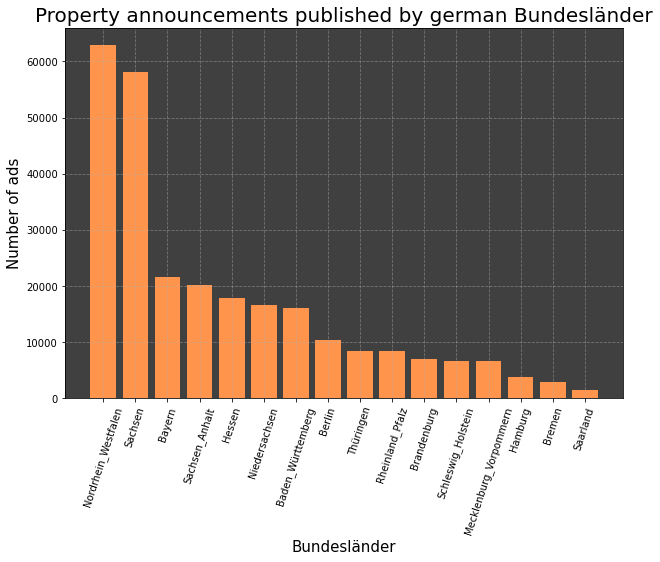

In [14]:
fig = plt.figure(figsize = (10,15))
ax1 = fig.add_subplot(2,1,1)
ax1.bar(bundesland_sorted['regio1'], bundesland_sorted['date'], color ='#ff944d')
plt.xticks(rotation=72)
ax1.set_facecolor('#404040')
ax1.grid(linestyle='--', alpha = 0.5)
ax1.set_title('Property announcements published by german Bundesländer', fontsize = 20)
ax1.set_xlabel('Bundesländer', fontsize =15)
ax1.set_ylabel('Number of ads', fontsize = 15)

In [15]:
mask = (housing.regio1 == 'Nordrhein_Westfalen') & (housing.typeOfFlat == 'apartment')
housing1= housing[mask]
housing1 = housing1[['regio1', 'heatingType', 'totalRent','yearConstructed','noParkSpaces', 'baseRent', 'livingSpace','noRooms', 'numberOfFloors','regio3', 'heatingCosts']]
housing1.shape

(33957, 11)

<h2> 4. Exploratory Data Analysis (EDA) </h2>


In [ ]:
housing

In [16]:
housing.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [ ]:
data_min, data_max = rent_costs.min(), rent_costs.max()
quartiles = percentile(rent_costs, [25, 50, 75])
#print 5-number summary
print('Min: %.0f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.0f' % quartiles[1])
print('Q3: %.0f' % quartiles[2])
print('Max: %.0f' % data_max)

In [ ]:
mean_m2=housing.livingSpace.mean()
print("The square meters mean is: "+mean_m2)
median_m2=housing.livingSpace.median()
mode_m2=housing.livingSpace.mode()
variance_m2= np.var(housing.livingSpace)
std_m2=np.std(housing.livingSpace)
print(mean_m2,median_m2,mode_m2)
print(variance_m2,std_m2)

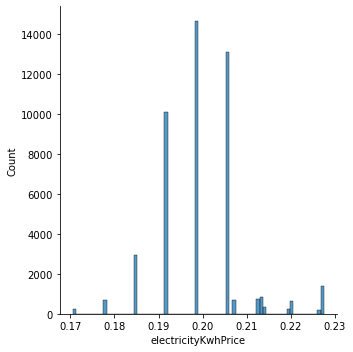

In [10]:
sns.displot(housing.electricityKwhPrice)

In [ ]:
housing_year= housing[(housing.yearConstructed>1800)]
sns.displot(housing_year)

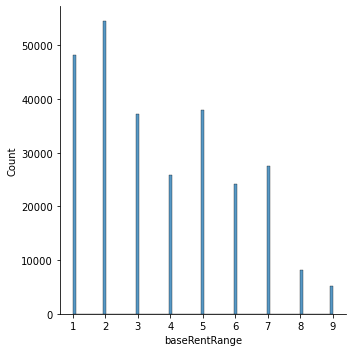

In [9]:
sns.displot(housing.baseRentRange)

In [36]:
housing.regio1.head()

0    Nordrhein_Westfalen
1        Rheinland_Pfalz
2                Sachsen
3                Sachsen
4                 Bremen
Name: regio1, dtype: object

In [37]:
housing_prueba = housing.loc[(housing['regio1']=='Nordrhein_Westfalen')  & (housing['regio2']=='Münster') , ['serviceCharge','totalRent']]
housing_prueba.head()

,serviceCharge,totalRent
852,50.0,NaN
2858,140.0,730.00
2946,185.0,2970.00
2970,315.0,2090.00
3117,94.0,516.19


<AxesSubplot:xlabel='totalRent', ylabel='Count'>

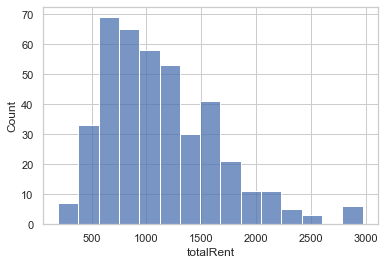

In [38]:
sns.histplot(housing_prueba.totalRent)

In [47]:
housing_berlin = housing.loc[(housing['regio1']=='Berlin') & (housing['regio2']=='Berlin'), ['serviceCharge','totalRent']]
housing_berlin.head()

,serviceCharge,totalRent
45,320.00,1140.00
61,79.00,955.00
77,150.00,1300.00
86,228.78,1428.78
87,147.08,1559.05


<AxesSubplot:xlabel='totalRent', ylabel='Count'>

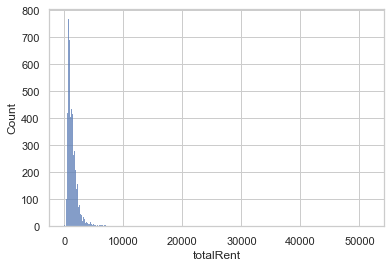

In [48]:
sns.histplot(housing_berlin.totalRent)

In [ ]:
sns.hisplot(housing['totalRent'])


In [ ]:
sns.histplot(housing.totalRent[totalRent >=400])

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

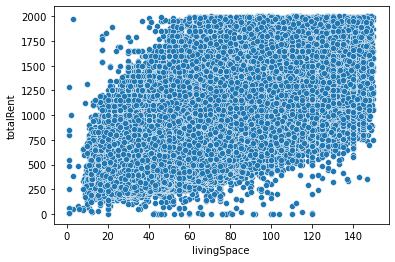

In [22]:
housing2= housing[(housing.totalRent < 2000) & (housing.totalRent>0)]
housing2= housing2[(housing2.livingSpace <150)& (housing2.livingSpace>0)]
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent")


In [23]:
# Let’s try using a random 5% of the data: 
perc = 0.05
housing_sub = housing2.sample(n = int(housing2.shape[0]*perc))
sns.scatterplot(data=housing_sub, x="livingSpace", y="totalRent")


SyntaxError: invalid character in identifier (<ipython-input-23-b48a90d466ce>, line 3)

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

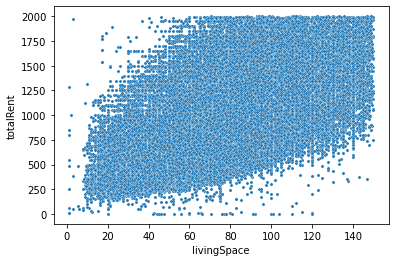

In [24]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", s=10)

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

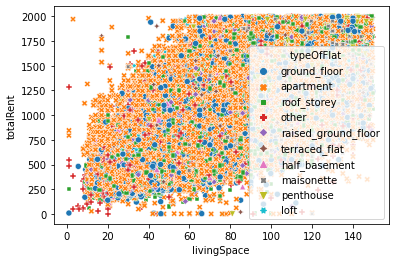

In [28]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent", hue="typeOfFlat", style="typeOfFlat")

<AxesSubplot:xlabel='livingSpace', ylabel='totalRent'>

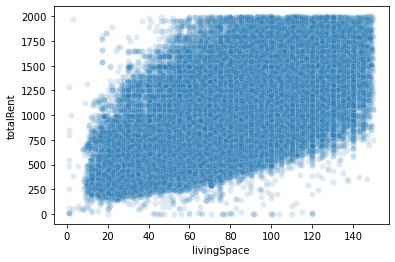

In [34]:
sns.scatterplot(data=housing2, x="livingSpace", y="totalRent",alpha=0.15)


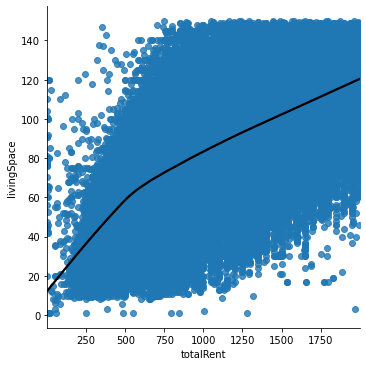

In [42]:
g1 = sns.lmplot(x="totalRent", y="livingSpace", data=housing2,line_kws={'color': 'black'}, lowess=True)


We can watch how the price has a linear relationship between total rent and living space, however the step of the curv changes when the living space is over 60 square meters 

In [38]:
sns.lmplot(x='livingSpace', y='totalRent', data = housing2, line_kws={'color': 'black'}, lowess=True)

SyntaxError: invalid character in identifier (<ipython-input-38-5a48b67c7195>, line 1)

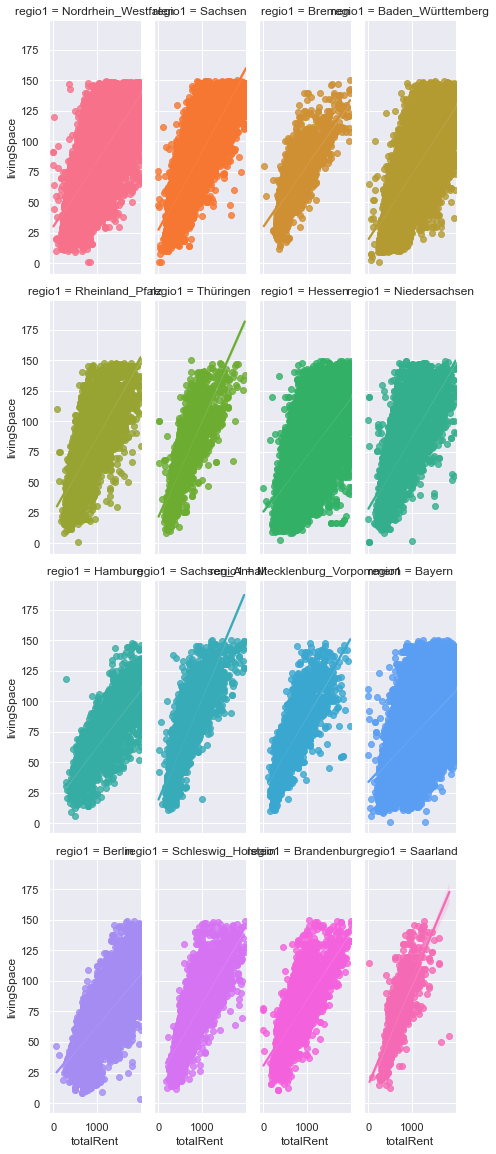

In [53]:
g = sns.lmplot(x="totalRent", y="livingSpace", hue="regio1", col="regio1",
               data=housing2, col_wrap=4,height=4, aspect=.4, x_jitter=.1)

/Users/enriqueviv/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newlyConst', ylabel='hasKitchen'>

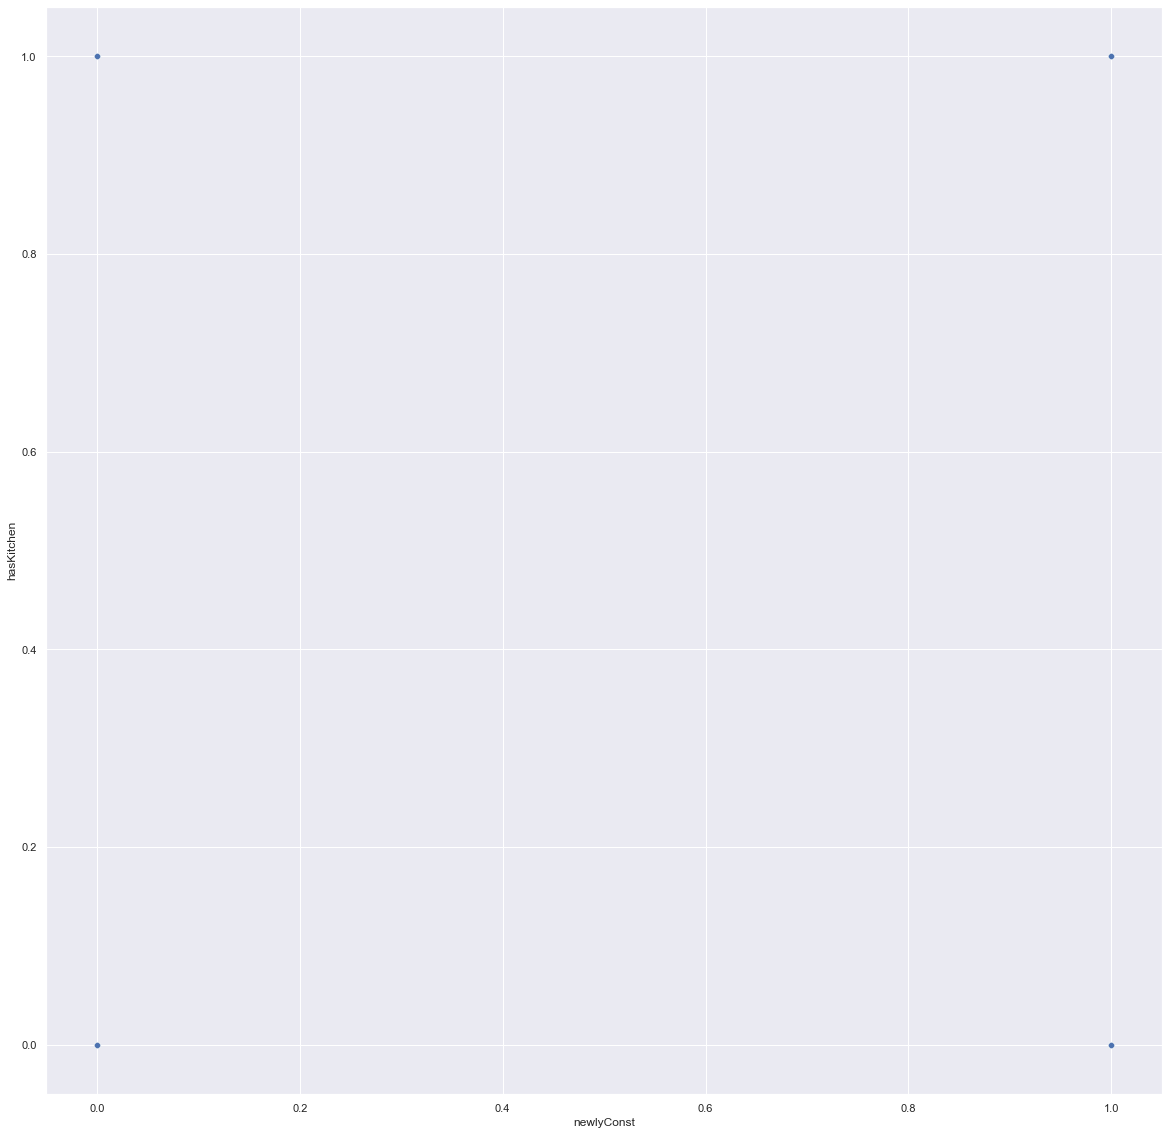

In [64]:
sns.scatterplot('newlyConst','hasKitchen',data=housing)

We can see how Bayern and Nordrhein Westphalen has the more variance between the line and the points to each side 

In [19]:
corr_matrix = housing1.corr()

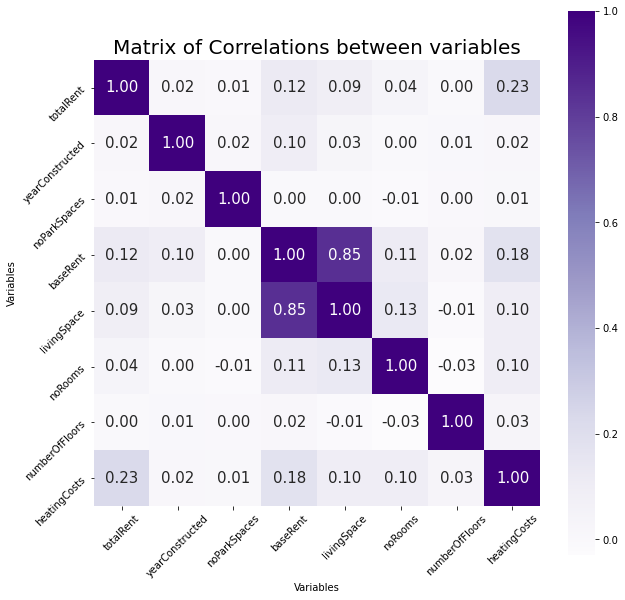

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')
plt.title('Matrix of Correlations between variables', fontsize=20)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation = 45)
plt.yticks(rotation =45)
plt.show()

In [21]:
corr_matrix2= housing.corr()

<AxesSubplot:xlabel='yearConstructed', ylabel='totalRent'>

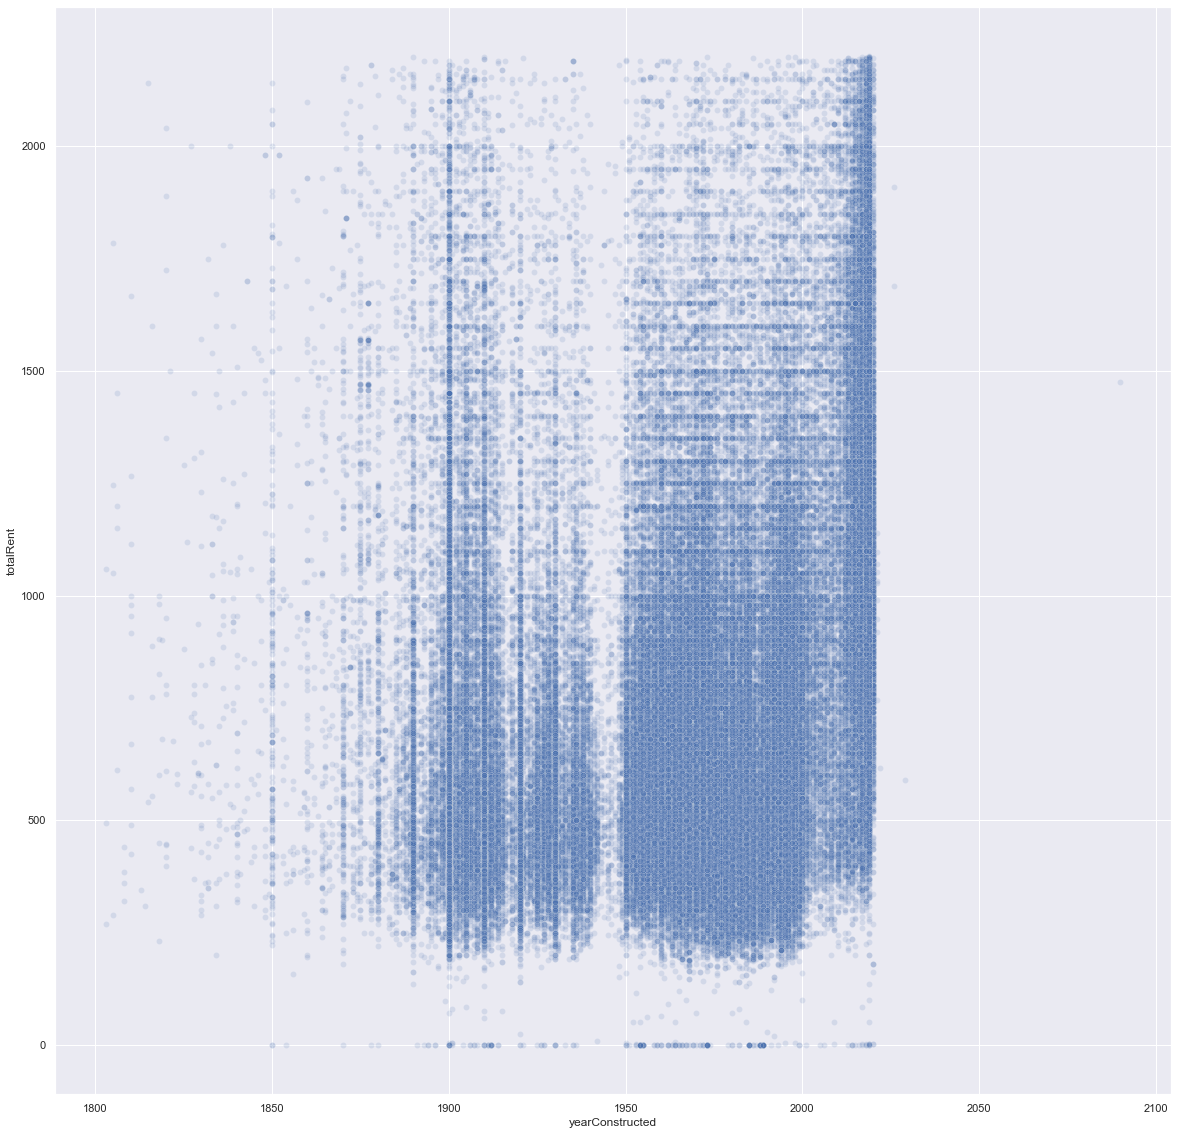

In [58]:
housing_year_con= housing[(housing.totalRent < 2200) & (housing.yearConstructed>1800)]
sns.scatterplot(data=housing_year_con, x="yearConstructed", y="totalRent",alpha=0.15)

#sns.scatterplot(x=housing['yearConstructed'],y=housing['totalRent'])

<AxesSubplot:>

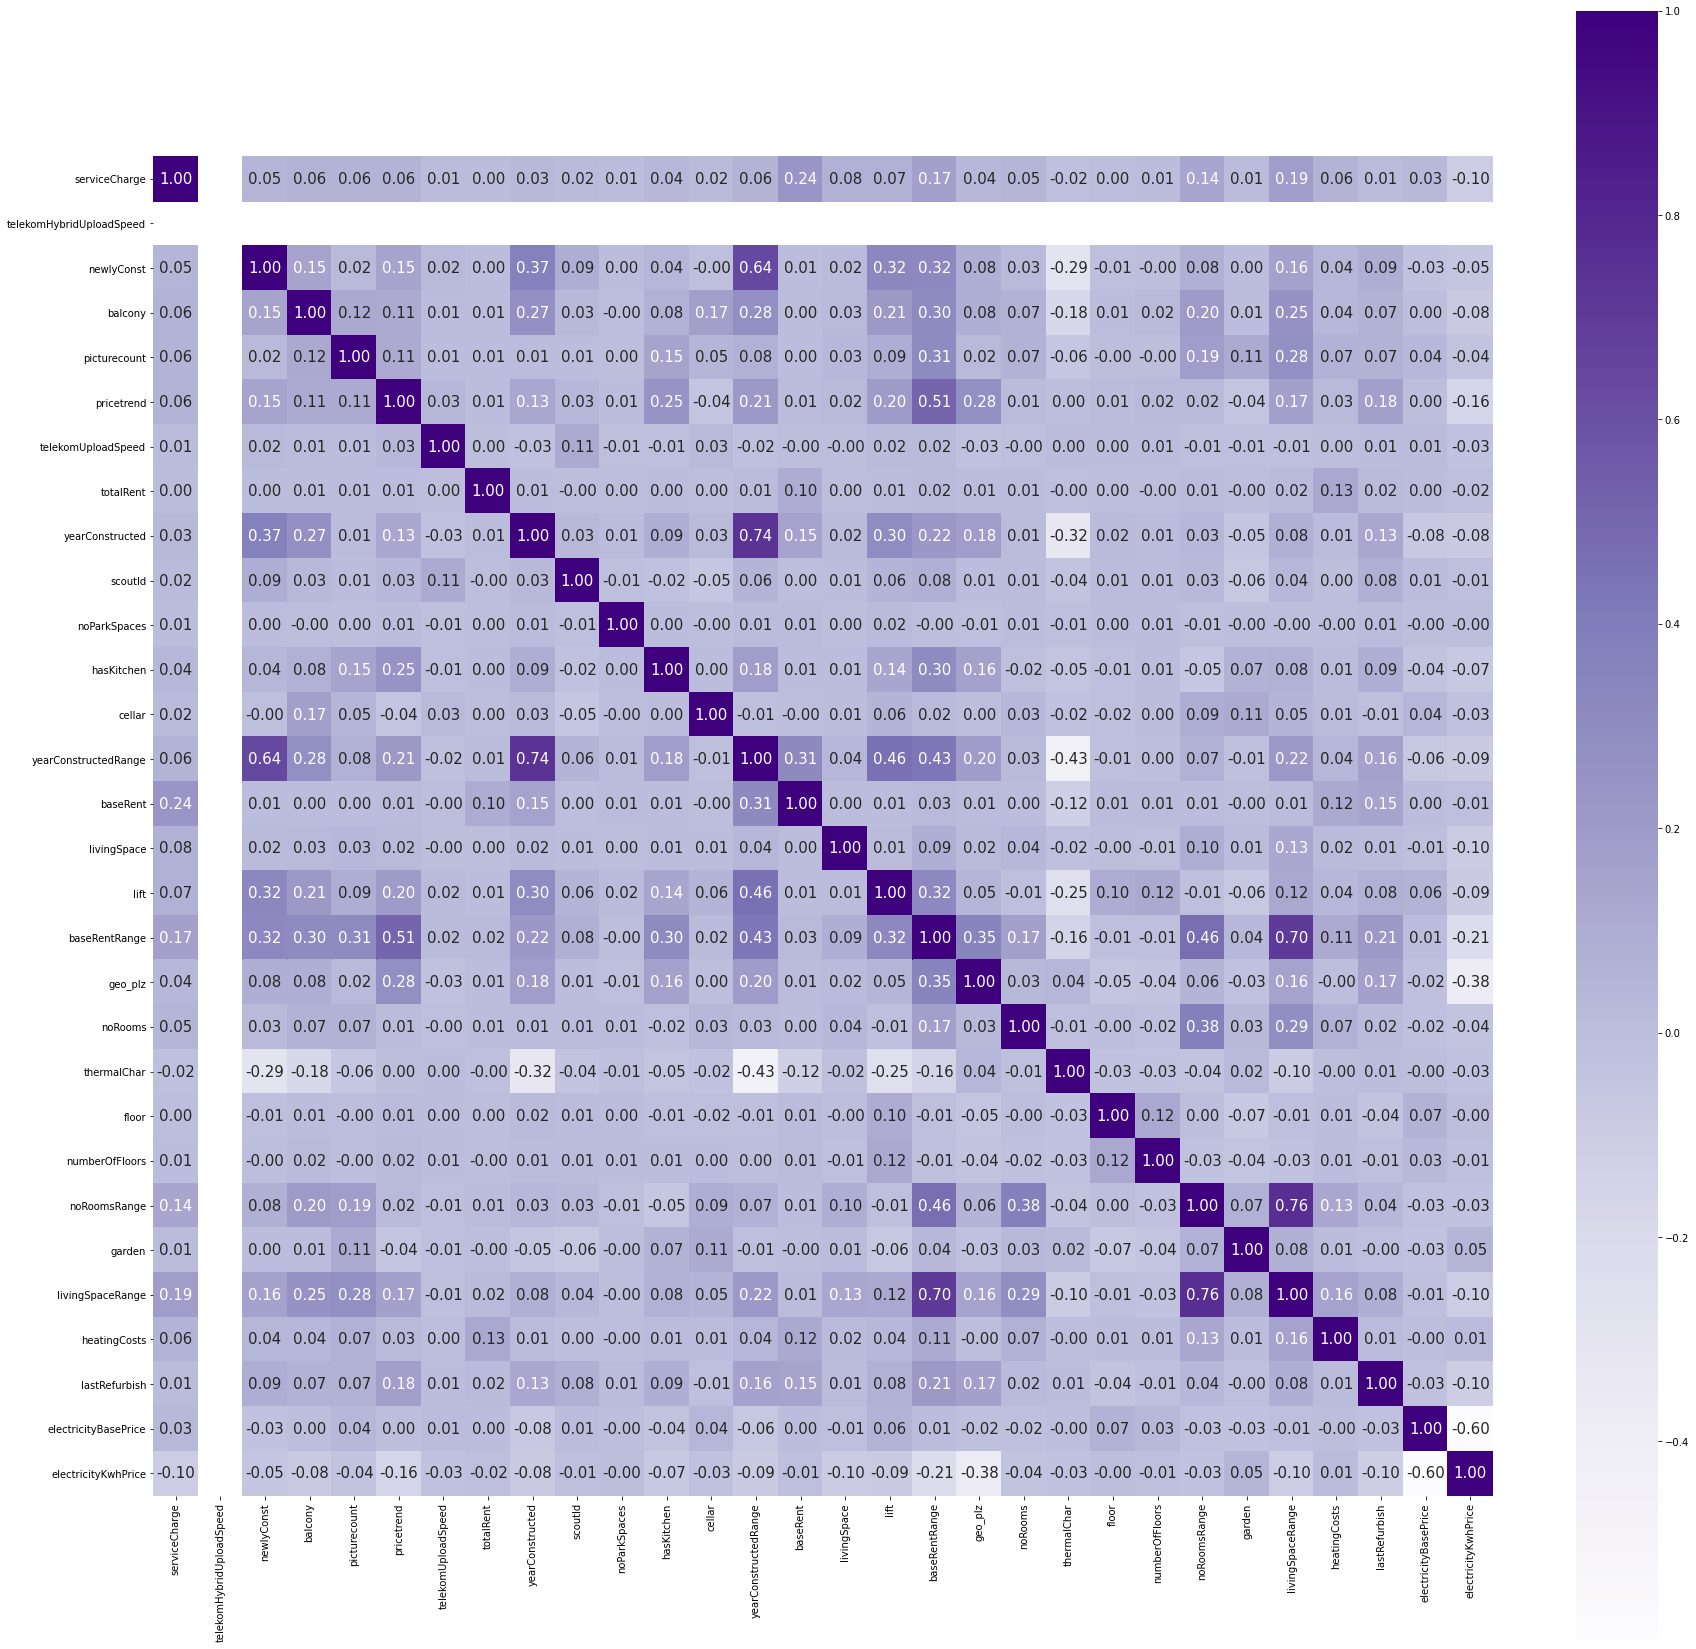

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix2, cbar=True, square= True, annot=True, fmt='.2f',annot_kws={'size':15},cmap='Purples')

In [24]:
print(housing.typeOfFlat.unique())

['ground_floor' 'apartment' 'other' nan 'roof_storey'
 'raised_ground_floor' 'terraced_flat' 'half_basement' 'maisonette'
 'penthouse' 'loft']


yearConstructed maximum value is 2090 which hasnt yet come

In [ ]:
rent_cost=housing['totalRent']

In [ ]:
rent_costs=rent_cost[~pd.isnull(rent_cost)]


In [ ]:
fig, axs = plt.subplots(figsize=(7,3), dpi=100)
plt.subplot(1,2,1)
sns.histplot(housing['totalRent']).set_title('Distibution of Rent Prices', weight='bold')

In [ ]:
sns.histplot(
    housing.baseRent,
    x="H", hue="date",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

In [ ]:

plt.figure(figsize=[12,4])
sns.distplot(housing['yearConstructed'], color='red')
plt.title('Year of Construction')
plt.show()

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['totalRent'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='totalRent', ylabel='date');

In [ ]:
sns.distplot(housing['totalRent'], bins=3, kde=True, rug=True)


Separation of data into training and test sets

In [15]:
X = housing.drop(['totalRent'],axis =1)
y= housing['totalRent']

In [16]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=72,test_size= 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(215080, 48) (53770, 48) (215080,) (53770,)


In [19]:
# Decision Tree Model.
reg_tree = DecisionTreeRegressor(random_state = 42)
reg_tree.fit(X_train, y_train)

y_tree_train_predict = reg_tree.predict(X_train)
y_tree_test_predict = reg_tree.predict(X_test)

tree_r2_train = r2_score(y_train, y_tree_train_predict)
tree_r2_test = r2_score(y_test, y_tree_test_predict)

print('Maximum depth of the model:', reg_tree.get_depth())

ValueError: could not convert string to float: 'Sachsen'